<a href="https://colab.research.google.com/github/lymoelopez/automated-filipino-fake-news-detector/blob/main/baselineModelEvaluationAndTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline Model Evaluation and Testing

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Load Preprocessed Testing Dataset

In [2]:
from google.colab import files
import io

In [3]:
# Import preprocessed testing dataset from local files
preprocessedTestingDataset = files.upload()

Saving test.csv to test.csv


In [4]:
# Store preprocessed testing dataset into separate Pandas Dataframes
preprocessedTestingDataFrame = pd.read_csv(io.BytesIO(preprocessedTestingDataset['test.csv']))

In [5]:
preprocessedTestingDataFrame.head()

,Unnamed: 0,label,headline
0,0,0,<s> ika - 2 Ġang Ġph Ġsa Ġas ia - p ac ific Ġs...
1,1,0,"<s> agu irre , Ġhepe Ġng Ġpc so , Ġitinanggi Ġ..."
2,2,0,<s> s inabi Ġni Ġd uterte Ġna Ġmabibigo Ġang Ġ...
3,3,0,<s> b inalaan Ġng Ġgrupo Ġang Ġb far Ġsa Ġlaw ...
4,4,0,<s> hum ingi Ġsi Ġsolon Ġkay Ġd uterte Ġng Ġje...


## II. Feature Extraction

In [8]:
import pickle

def loadModel(filename):
   model = pickle.load(open(filename, 'rb'))
   return model

In [9]:
tfidfVectorizerUpload = files.upload()

Saving baselineTfidfVectiruzer.sav to baselineTfidfVectiruzer.sav


In [11]:
featureExtraction = loadModel('baselineTfidfVectiruzer.sav')

In [12]:
testingData = preprocessedTestingDataFrame.headline
testingLabel = preprocessedTestingDataFrame.label

In [14]:
# transform test set
tfidf_TestingData = featureExtraction.transform(testingData)

## Evaluation

### Load Trained Models

In [16]:
lrUpload = files.upload()
xgbUpload = files.upload()
svmUpload = files.upload()
sgdUpload = files.upload()
pacUpload = files.upload()
votingUpload = files.upload()

Saving lrBaseline.sav to lrBaseline.sav


Saving xgbBaseline.sav to xgbBaseline.sav


Saving svmBaseline.sav to svmBaseline.sav


Saving sgdBaseline.sav to sgdBaseline.sav


Saving pacBaseline.sav to pacBaseline.sav


Saving votingBaseline.sav to votingBaseline.sav


In [17]:
logisticRegressionClassifier = loadModel('lrBaseline.sav')
xgbClassifier = loadModel('xgbBaseline.sav')
svmClassifier = loadModel('svmBaseline.sav')
sgdClassifier = loadModel('sgdBaseline.sav')
passiveAggressiveClassifier = loadModel('pacBaseline.sav')
votingClassifier = loadModel('votingBaseline.sav')

In [18]:
modelsList = [logisticRegressionClassifier, xgbClassifier, svmClassifier, sgdClassifier, passiveAggressiveClassifier, votingClassifier]

### Evaluate Trained Models

In [19]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

In [20]:
def findModelPrediction(model, tfidf_TestingData, testingLabel):
  predictionLabel = model.predict(tfidf_TestingData)
  return predictionLabel

In [21]:
def findConfusionMatrix(testingLabel, predictionLabel):
  confusionMatrix = confusion_matrix(testingLabel, predictionLabel)
  return confusionMatrix

In [22]:
def findPrecisionRecallF1score(confusionMatrix, fake_is_1):
  # when fake news are reprsented by 1 (default for our dataset), then true positives correspond to fake news 
  # when fake news are represented by 0, then true positives correspond to real news instead

  if fake_is_1:
    tn, fp, fn, tp = confusionMatrix.ravel()
  else:
    tp, fn, fp, tn = confusionMatrix.ravel()

  precision = tp/(tp + fp)
  recall = tp/(tp + fn)
  f1score = 2 * (recall * precision)/(recall + precision)
  
  return precision, recall, f1score

In [23]:
def findMetrics(testingLabel, predictionLabel):

  confusionMatrix = findConfusionMatrix(testingLabel, predictionLabel)

  accuracy = accuracy_score(testingLabel, predictionLabel)
  fakePrecision, fakeRecall, fakeF1score = findPrecisionRecallF1score(confusionMatrix, 1)
  realPrecision, realRecall, realF1score = findPrecisionRecallF1score(confusionMatrix, 1)
  metrics = [accuracy, fakePrecision, fakeRecall, fakeF1score, realPrecision, realRecall, realF1score]

  return metrics
  

In [24]:
def findModelMetricsAndConfusionMatrix(model, tfidf_TestingData, testingLabel):
  predictionLabel = findModelPrediction(model, tfidf_TestingData, testingLabel)
  metrics = findMetrics(testingLabel, predictionLabel)
  confusionMatrix = findConfusionMatrix(testingLabel, predictionLabel)

  return metrics, confusionMatrix

In [25]:
def printMetrics(metrics, decimalPlace=2):

  accuracy, fakePrecision, fakeRecall, fakeF1score, realPrecision, realRecall, realF1score = metrics

  print(f'Accuracy: {round(accuracy*100, decimalPlace)}%')
  print(f'Fake Precision: {round(fakePrecision*100,2)}%')
  print(f'Fake Recall: {round(fakeRecall*100,2)}%')
  print(f'Fake F1-Score: {round(fakeF1score*100,2)}%')
  print(f'Real Precision: {round(realPrecision*100,2)}%')
  print(f'Real Recall: {round(realRecall*100,2)}%')
  print(f'Real F1-Score: {round(realF1score*100,2)}%')

### Save Findings

In [30]:
accuracyList = []
fakePrecisionList = []
FakeRecallList = []
fakeF1scoreList = []
realPrecisionList = []
realRecallList = []
realF1scoreList = [] 
confusionMatrixList = []

for model in modelsList:
  metrics, confusionMatrix =  findModelMetricsAndConfusionMatrix(model, tfidf_TestingData, testingLabel)
  accuracy, fakePrecision, fakeRecall, fakeF1score, realPrecision, realRecall, realF1score = metrics

  accuracyList.append(accuracy)
  fakePrecisionList.append(fakePrecision)
  FakeRecallList.append(fakeRecall)
  fakeF1scoreList.append(fakeF1score)
  realPrecisionList.append(realPrecision)
  realRecallList.append(realRecall)
  realF1scoreList.append(realF1score)
  confusionMatrixList.append(confusionMatrix)

In [46]:
modelNamesList = ["lr", 'xgb', 'svm', 'sgd', 'pac', 'voting']

metricsFindingsDataFrame = pd.DataFrame({'Model': modelNamesList, 'Accuracy': accuracyList, 'Fake Precision': fakePrecisionList, 'Fake Recall': FakeRecallList, 'Fake F1-score': fakeF1scoreList, 'Real Precision': realPrecisionList, 'Real Recall': realRecallList, 'Real F1-score': realF1scoreList})
confusionMatrixFindingsDataFrame = pd.DataFrame({'Model': modelNamesList, 'Confusion Matrix (tn, fp, fn, tp)': confusionMatrixList})

In [47]:
metricsFindingsDataFrame.to_csv('metricsBaselineFindings.csv', index=False)
confusionMatrixFindingsDataFrame.to_csv('confusionMatrixBaselineFindings.csv', index=False)

### Visualize Findings

In [48]:
metricsFindingsDataFrame.head(6)

,Model,Accuracy,Fake Precision,Fake Recall,Fake F1-score,Real Precision,Real Recall,Real F1-score
0,lr,0.676196,0.690855,0.090778,0.160471,0.690855,0.090778,0.160471
1,xgb,0.663683,0.519815,0.176463,0.263481,0.519815,0.176463,0.263481
2,svm,0.674904,0.694414,0.082811,0.147975,0.694414,0.082811,0.147975
3,sgd,0.677086,0.662119,0.107759,0.185352,0.662119,0.107759,0.185352
4,pac,0.674993,0.563052,0.208203,0.303995,0.563052,0.208203,0.303995
5,voting,0.676240,0.662722,0.102403,0.177396,0.662722,0.102403,0.177396


In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def showConfusionMatrix(confusionMatrix, modelName):
  display = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=["Real News", "Fake News"])
  display.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
  plt.title(modelName)
  plt.show()

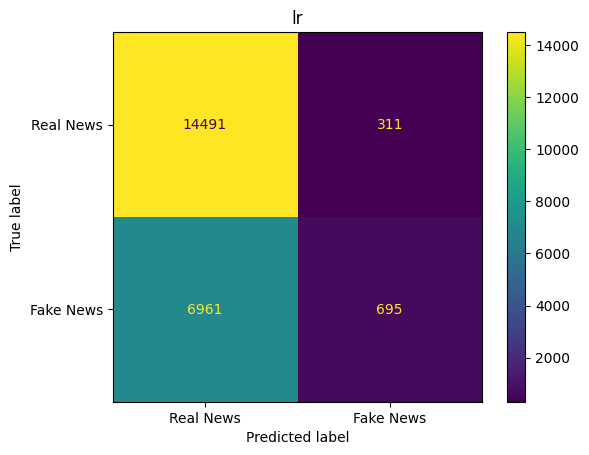

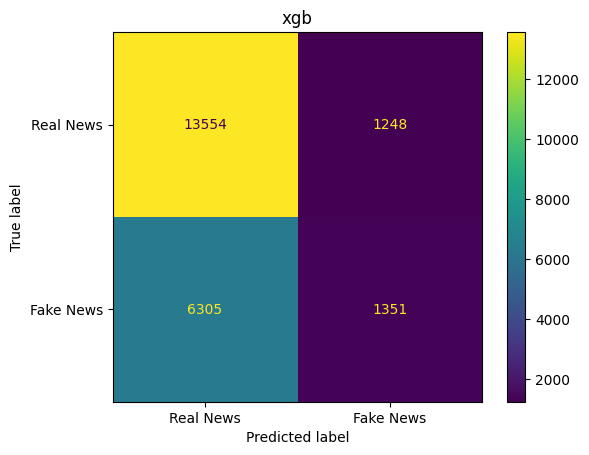

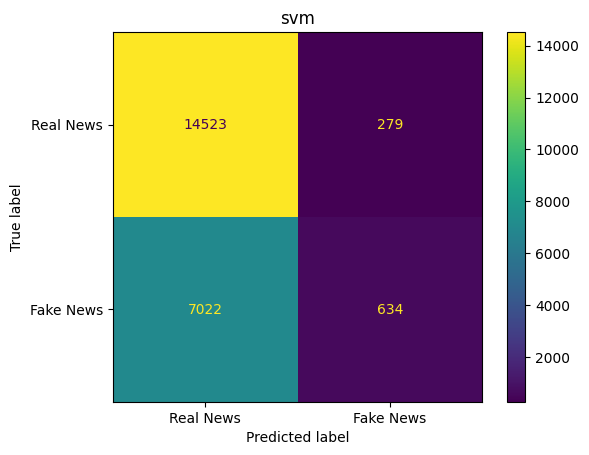

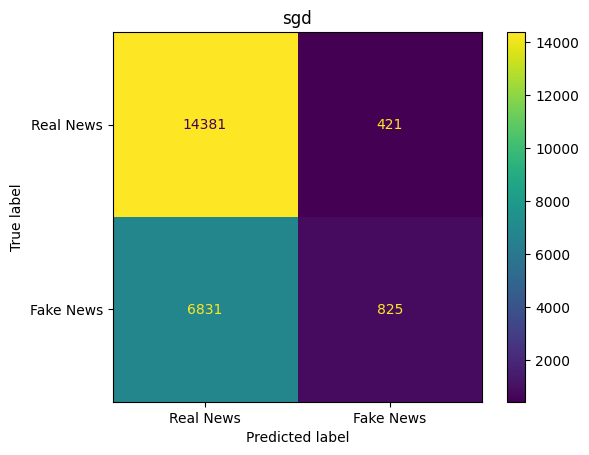

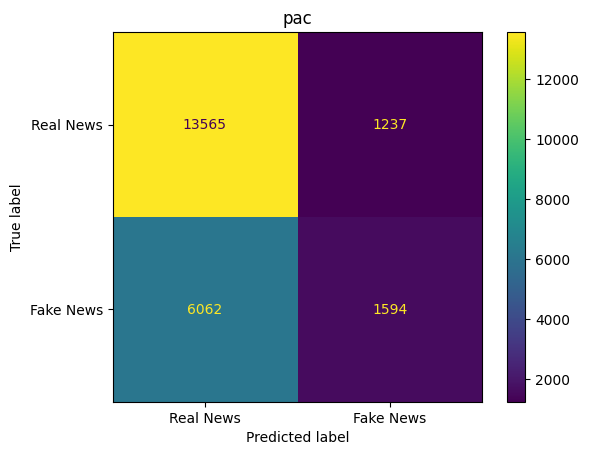

In [99]:
for i in range(5):
  ithModel = confusionMatrixFindingsDataFrame['Model'][i]
  ithConfusionMatrix = confusionMatrixFindingsDataFrame['Confusion Matrix (tn, fp, fn, tp)'][i]

  showConfusionMatrix(ithConfusionMatrix, ithModel)

##Testing

# References

[1] https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/

[2] https://github.com/nabi-hassan/Fake-news-Detection-using-Ensemble-Learning-/blob/master/newnote.ipynb

[3] https://towardsdatascience.com/fake-news-detection-with-machine-learning-using-python-3347d9899ad1

[4] https://jovian.ai/piero-paialunga/notebook

[5] https://youtu.be/5X27excCyXk

[6] https://medium.com/@yashj302/text-cleaning-using-regex-python-f1dded1ac5bd

[7] https://stackoverflow.com/questions/32705962/removing-any-single-letter-on-a-string-in-python?answertab=scoredesc#tab-top

[8] https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels